<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/geoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygeoda
!pip install mapclassify


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 8.5 MB/s eta 0:00:00


In [2]:
import os, zipfile
import pygeoda
import pandas as pd
import geopandas as gpd

import mapclassify

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
!wget -q -O columbus.zip https://geodacenter.github.io/data-and-lab/data/columbus.zip
zip_ref = zipfile.ZipFile('columbus.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
!ls columbus
col=gpd.read_file('columbus/columbus.shp')
#col.set_index('POLYID',inplace=True, drop=True,verify_integrity=True) #BUG gets wieght creation messed up :(

columbus.csv  columbus.geojson	columbus.kml  columbus.prj  columbus.sqlite
columbus.dbf  columbus.gpkg	columbus.mid  columbus.shp  columbus.xlsx
columbus.gdb  columbus.html	columbus.mif  columbus.shx


In [4]:
col.dtypes

AREA           float64
PERIMETER      float64
COLUMBUS_        int64
COLUMBUS_I       int64
POLYID           int64
NEIG             int64
HOVAL          float64
INC            float64
CRIME          float64
OPEN           float64
PLUMB          float64
DISCBD         float64
X              float64
Y              float64
NSA            float64
NSB            float64
EW             float64
CP             float64
THOUS          float64
NEIGNO         float64
geometry      geometry
dtype: object

In [5]:
col=col.drop(['AREA','PERIMETER','NSA','NSB','EW','CP'],axis=1)
col.head(2)

,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,THOUS,NEIGNO,geometry
0,2,5,1,5,80.467003,19.531,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,3,1,2,1,44.567001,21.232,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."


In [6]:
##import pyproj
##col.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
#px.choropleth(col, color="CRIME",locations=col.index, geojson=col.geometry
#                   )
colP = col.copy()
colP["geometry"] = colP["geometry"].centroid

<ipython-input-6-05319a68fc5c>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colP["geometry"] = colP["geometry"].centroid


<Axes: >

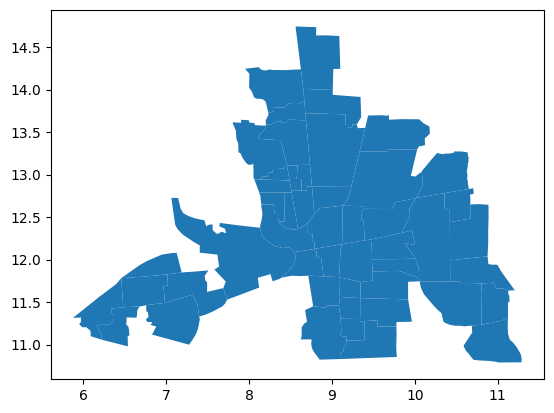

In [7]:
col.plot()

<Axes: >

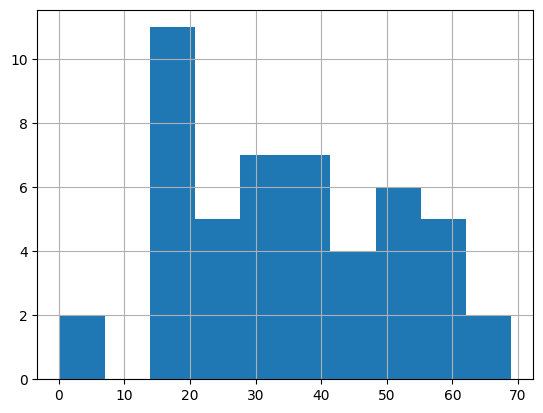

In [ ]:
col.CRIME.hist()

Text(8.827218469203908, 14.369076018912063, '0')

Text(8.332658372724923, 14.031624006323966, '1')

Text(9.0122654093717, 13.819719079969147, '2')

Text(8.460800893307436, 13.716962170228141, '3')

Text(9.007982127497685, 13.296366430537292, '4')

Text(9.739925828001203, 13.474632743210716, '5')

Text(8.118750060628729, 13.295703867053538, '6')

Text(8.496488171957548, 13.402612361972409, '7')

Text(9.630793442508981, 12.942724931765364, '8')

Text(10.366382709801057, 13.00188936025309, '9')

Text(8.669735412857046, 12.98012156123324, '10')

Text(8.544995589641779, 12.9531256839822, '11')

Text(8.349223482851055, 12.996094141102331, '12')

Text(8.292701516920957, 12.863707688216895, '13')

Text(8.973462206070094, 12.741586740380376, '14')

Text(8.655866335560422, 12.62731580875412, '15')

Text(10.528621192777077, 12.647475597059021, '16')

Text(8.487918125725194, 12.545342471590063, '17')

Text(8.312367703365632, 12.666720813263051, '18')

Text(10.190581526179413, 12.256899149288648, '19')

Text(7.847423618980444, 12.084997322022751, '20')

Text(9.655244367498366, 12.462765864102984, '21')

Text(10.671381108158549, 12.291571317666135, '22')

Text(8.420744068273082, 12.318013434287653, '23')

Text(8.938751825549426, 12.380509826386751, '24')

Text(9.250921130765516, 12.413783516339139, '25')

Text(9.737004148455055, 12.149692840219398, '26')

Text(9.297975780128176, 11.977787924704433, '27')

Text(8.977861502440566, 11.994012072407754, '28')

Text(8.68871949319255, 11.938718355531323, '29')

Text(6.8924823259937416, 11.914150957988443, '30')

Text(10.76378352110245, 11.844431047650396, '31')

Text(9.783876039871148, 11.922708164579584, '32')

Text(7.33943071762272, 11.628545121558876, '33')

Text(9.668248963690393, 11.692541207168867, '34')

Text(6.728837547719331, 11.634364976122036, '35')

Text(8.912362855719714, 11.630310543083501, '36')

Text(9.210527335403754, 11.659838850006437, '37')

Text(6.221942933898136, 11.402513578924117, '38')

Text(10.492492572016708, 11.507197282569432, '39')

Text(10.95358743637645, 11.479245868637376, '40')

Text(7.1100509053908985, 11.295438892865233, '41')

Text(9.214330280393483, 11.432771789368283, '42')

Text(9.641904437882928, 11.391036212262494, '43')

Text(8.910340473827835, 11.148639078569653, '44')

Text(6.423385031583336, 11.219238093398321, '45')

Text(10.935302271773978, 11.010030663664562, '46')

Text(9.251957402833792, 11.181253873699427, '47')

Text(9.492143530360028, 11.014961106511862, '48')

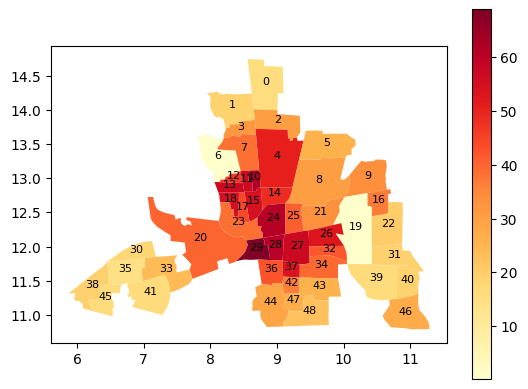

In [ ]:
ax=col.plot(column='CRIME',legend=True,cmap='YlOrRd') #,scheme='quantiles',k=5
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.index):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"
#note be careful: double triple check, may be sometimes off depending on sorting, esp if not sorted on index: https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=VVNjIKa67tJt

Text(8.827218469203908, 14.369076018912063, '0')

Text(8.332658372724923, 14.031624006323966, '1')

Text(9.0122654093717, 13.819719079969147, '2')

Text(8.460800893307436, 13.716962170228141, '3')

Text(9.007982127497685, 13.296366430537292, '4')

Text(9.739925828001203, 13.474632743210716, '5')

Text(8.118750060628729, 13.295703867053538, '6')

Text(8.496488171957548, 13.402612361972409, '7')

Text(9.630793442508981, 12.942724931765364, '8')

Text(10.366382709801057, 13.00188936025309, '9')

Text(8.669735412857046, 12.98012156123324, '10')

Text(8.544995589641779, 12.9531256839822, '11')

Text(8.349223482851055, 12.996094141102331, '12')

Text(8.292701516920957, 12.863707688216895, '13')

Text(8.973462206070094, 12.741586740380376, '14')

Text(8.655866335560422, 12.62731580875412, '15')

Text(10.528621192777077, 12.647475597059021, '16')

Text(8.487918125725194, 12.545342471590063, '17')

Text(8.312367703365632, 12.666720813263051, '18')

Text(10.190581526179413, 12.256899149288648, '19')

Text(7.847423618980444, 12.084997322022751, '20')

Text(9.655244367498366, 12.462765864102984, '21')

Text(10.671381108158549, 12.291571317666135, '22')

Text(8.420744068273082, 12.318013434287653, '23')

Text(8.938751825549426, 12.380509826386751, '24')

Text(9.250921130765516, 12.413783516339139, '25')

Text(9.737004148455055, 12.149692840219398, '26')

Text(9.297975780128176, 11.977787924704433, '27')

Text(8.977861502440566, 11.994012072407754, '28')

Text(8.68871949319255, 11.938718355531323, '29')

Text(6.8924823259937416, 11.914150957988443, '30')

Text(10.76378352110245, 11.844431047650396, '31')

Text(9.783876039871148, 11.922708164579584, '32')

Text(7.33943071762272, 11.628545121558876, '33')

Text(9.668248963690393, 11.692541207168867, '34')

Text(6.728837547719331, 11.634364976122036, '35')

Text(8.912362855719714, 11.630310543083501, '36')

Text(9.210527335403754, 11.659838850006437, '37')

Text(6.221942933898136, 11.402513578924117, '38')

Text(10.492492572016708, 11.507197282569432, '39')

Text(10.95358743637645, 11.479245868637376, '40')

Text(7.1100509053908985, 11.295438892865233, '41')

Text(9.214330280393483, 11.432771789368283, '42')

Text(9.641904437882928, 11.391036212262494, '43')

Text(8.910340473827835, 11.148639078569653, '44')

Text(6.423385031583336, 11.219238093398321, '45')

Text(10.935302271773978, 11.010030663664562, '46')

Text(9.251957402833792, 11.181253873699427, '47')

Text(9.492143530360028, 11.014961106511862, '48')

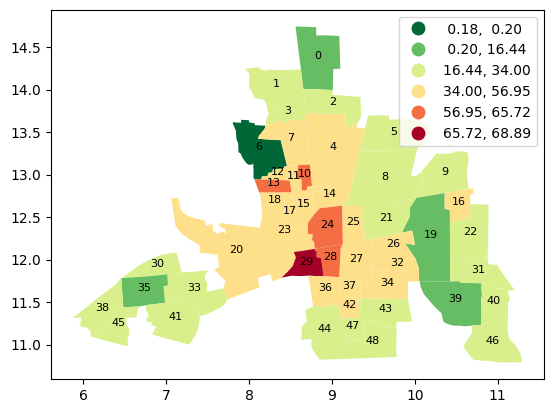

In [ ]:
ax=col.plot(column='CRIME',legend=True,scheme='percentiles',cmap='RdYlGn_r' ) #focus on outliers
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.index):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=8) #ytext=(3, 3), textcoords="offset points"

In [ ]:
import plotly.express as px
px.scatter(col, x="CRIME", y="HOVAL",
                  hover_data=[col.index],width=1000,height=600)

In [ ]:
col.head(2)

,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,THOUS,NEIGNO,geometry
0,2,5,1,5,80.467003,19.531,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,3,1,2,1,44.567001,21.232,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."


### pygeodata

In [8]:
g_col = pygeoda.open(col)
queen_w = pygeoda.queen_weights(g_col)
queen_w

Weights Meta-data:
 number of observations:                   49
           is symmetric:                 True
               sparsity:   0.0982923781757601
        # min neighbors:                    2
        # max neighbors:                   10
       # mean neighbors:    4.816326530612245
     # median neighbors:                  4.0
           has isolates:                False

In [ ]:
queen_w.get_neighbors(0)

(1, 2)

In [ ]:
queen_w.get_neighbors(1)

(0, 2, 3)

In [ ]:
col['CRIME'][0] #going back to 1st example--0 has crime of:

15.72598

In [ ]:
#and its 2 neighbors:
col['CRIME'][1]
print('')
col['CRIME'][2]

18.801754

30.626781

In [ ]:
#so queen spatially lagged crime for 0 is the average of its 2 neighbors:
(col['CRIME'][1]+col['CRIME'][2])/2

24.7142675

In [ ]:
queen_w.spatial_lag(col['CRIME'])[0] #yay; and more functions: https://geodacenter.github.io/pygeoda/spatial_weights.html#queen-contiguity-weights

24.7142675

In [9]:
#import numpy as np #TODO: not sure about this! there must be fucntion to calc it plus slides say its .5, not .7
#np.corrcoef(col['CRIME'], queen_w.spatial_lag(col['CRIME']))

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

[Text(0.5, 1.0, 'Local Moran Cluster Map of Crm_prp\n Population per Crime against persons')]

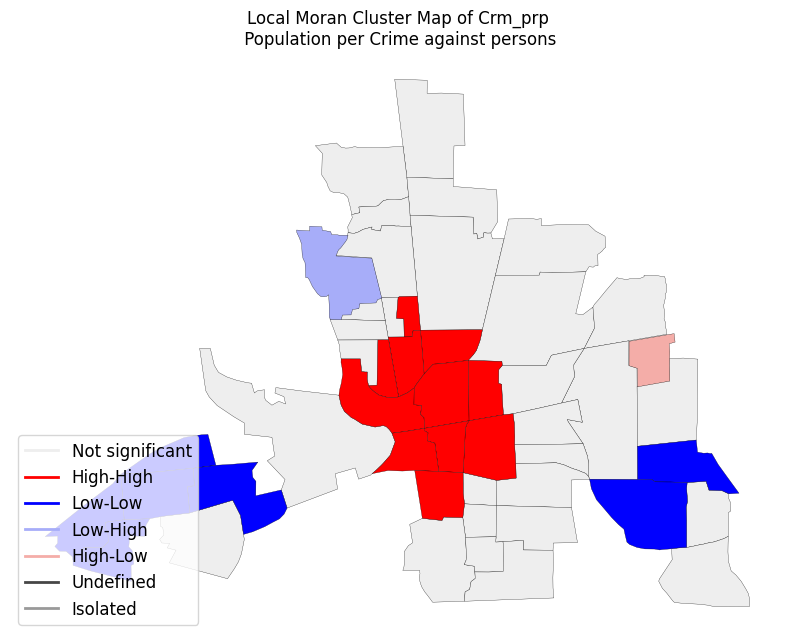

In [ ]:
#https://geodacenter.github.io/pygeoda/esda_geopandas.html#geopandas-pygeoda

crm_prp = col['CRIME']
crm_lisa = pygeoda.local_moran(queen_w, crm_prp)

import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = crm_lisa.lisa_colors()
lisa_labels = crm_lisa.lisa_labels()

# attach LISA cluster indicators to geodataframe
col['LISA'] = crm_lisa.lisa_clusters()

for ctype, data in col.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of crime')
ax.set_axis_off()

### pysal / esda

https://github.com/pysal/esda/

In [12]:
!pip install libpysal
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.9 MB/s eta 0:00:00


In [13]:
import libpysal as lps
import esda

In [14]:
#https://github.com/pysal/esda/blob/main/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb
wq =  lps.weights.Queen.from_dataframe(col)
wq.transform = 'r'

<ipython-input-14-8fcd70f9a717>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(col)


In [15]:
y = col['CRIME']
ylag = lps.weights.lag_spatial(wq, y)

In [10]:
#np.corrcoef(y,ylag) #ah ok again same thing

In [16]:
mi = esda.moran.Moran(y, wq) #ha so now we got .5 as the slides say
mi.I

0.5001885571828611

# TODO

have morans i scatterplot useful

have old fashioned geoda run this stuff and make sure we are good! maybe already at bsb134 or library or some classroom